# SCA Final Project : Data Science (Beginner's Track)
## Analysing - Cleaning - Visualizing - Machine Learning
#### Dataset: used_car catalog (https://www.kaggle.com/datasets/lepchenkov/usedcarscatalog)


### Introduction: 
* The dataset contains the advertisement of cars for sale on a popular car catalog site in Belarus, the data was developed in 2019. The data comprises of different features as well as the price of each car in the catalog. This analysis is done in order to investigate if there are features that have an impact on the price of a car. Final step carried out is to predict the price of the cars based on some features.

The following steps are carried out in order to draw insights from the dataset:
1. Assessing the Data
2. Cleaning the Data (Data Wrangling)
3. Visualizing and drawing insights


In [238]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [239]:
# load dataset
df = pd.read_csv('cars.csv')
pd.set_option("display.max_columns", None)
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,Минская обл.,9,13,False,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,Минская обл.,12,54,False,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,Минская обл.,4,72,False,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,Минская обл.,9,42,True,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,Гомельская обл.,14,7,False,True,False,True,True,False,False,False,False,True,7


In [240]:
# check the shape of the dataset
df.shape

(38531, 30)

## Assessing Data

In [241]:
# show information about the dataset
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool   
 16  location_region    385

In [242]:
# display descriptive summary of the data
df.describe()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
count,38531.000000,38531.000000,38521.000000,38531.000000,38531.000000,38531.000000,38531.000000
mean,248864.638447,2002.943734,2.055161,6639.971021,9.649062,16.306091,80.577249
std,136072.376530,8.065731,0.671178,6428.152018,6.093217,43.286933,112.826569
min,0.000000,1942.000000,0.200000,1.000000,1.000000,1.000000,0.000000
25%,158000.000000,1998.000000,1.600000,2100.000000,5.000000,2.000000,23.000000
50%,250000.000000,2003.000000,2.000000,4800.000000,8.000000,5.000000,59.000000
75%,325000.000000,2009.000000,2.300000,8990.000000,12.000000,16.000000,91.000000
max,1000000.000000,2019.000000,8.000000,50000.000000,86.000000,1861.000000,2232.000000


In [243]:
# checking for null values in each column
df.isnull().sum()

manufacturer_name     0
model_name            0
transmission          0
color                 0
odometer_value        0
year_produced         0
engine_fuel           0
engine_has_gas        0
engine_type           0
engine_capacity      10
body_type             0
has_warranty          0
state                 0
drivetrain            0
price_usd             0
is_exchangeable       0
location_region       0
number_of_photos      0
up_counter            0
feature_0             0
feature_1             0
feature_2             0
feature_3             0
feature_4             0
feature_5             0
feature_6             0
feature_7             0
feature_8             0
feature_9             0
duration_listed       0
dtype: int64

In [244]:
# check for unique values
df.nunique()

manufacturer_name      55
model_name           1118
transmission            2
color                  12
odometer_value       6063
year_produced          64
engine_fuel             6
engine_has_gas          2
engine_type             3
engine_capacity        61
body_type              12
has_warranty            2
state                   3
drivetrain              3
price_usd            2677
is_exchangeable         2
location_region         6
number_of_photos       61
up_counter            384
feature_0               2
feature_1               2
feature_2               2
feature_3               2
feature_4               2
feature_5               2
feature_6               2
feature_7               2
feature_8               2
feature_9               2
duration_listed       786
dtype: int64

In [245]:
# checking for duplicated rows
df.duplicated().sum()

40

In [246]:
# value count of engine type
df.engine_type.value_counts()

gasoline    25647
diesel      12874
electric       10
Name: engine_type, dtype: int64

In [247]:
# value count of transimssion
df.transmission.value_counts()

mechanical    25633
automatic     12898
Name: transmission, dtype: int64

In [248]:
# value_count of engine fuel
df.engine_fuel.value_counts()

gasoline         24065
diesel           12872
gas               1347
hybrid-petrol      235
electric            10
hybrid-diesel        2
Name: engine_fuel, dtype: int64

## Quality Issues observed in the dataset

* 40 duplicate rows

* Missing values in **'engine capacity'** column

* **Location name** written in Belarusian language, for better understanding, specific words will be renamed.

* Grouping **price column** into different categories.

* Creating a new identifier column

* From the descriptive summary (df.describe), it is observed that some car price were at 1 dollar

## Cleaning Dataset

In [249]:
cars_df = df.copy()

#### 1. Dropping duplicate rows

In [250]:
# dropping duplicate rows

cars_df = cars_df.drop_duplicates()
cars_df.shape

(38491, 30)

#### 2. Replacing missing values with median 

In [251]:
# checking the mean and median value
print("Mean Value: ", cars_df['engine_capacity'].mean())
print("Median Value: ", cars_df['engine_capacity'].median())

# replacing the missing values with the median
cars_df['engine_capacity'] = cars_df['engine_capacity'].fillna(cars_df['engine_capacity'].median())

Mean Value:  2.0555380837297443
Median Value:  2.0


In [252]:
cars_df['engine_capacity'].isnull().sum()

0

#### 3. Renaming values

In [253]:
cars_df['location_region'] = cars_df['location_region'].replace(["Минская обл.", "Гомельская обл.", "Витебская обл.", "Брестская обл.",
                                                                     "Могилевская обл.", "Гродненская обл."],
                                                          ["Minsk Oblast", "Gomel Oblast", "Vitebsk Oblast", "Brest Oblast",
                                                          "Magilev Oblast", "Hrodna Oblast"])

In [254]:
cars_df['location_region'].value_counts()

Minsk Oblast      24194
Gomel Oblast       3140
Vitebsk Oblast     3005
Brest Oblast       2989
Magilev Oblast     2678
Hrodna Oblast      2485
Name: location_region, dtype: int64

#### 4. Grouping price column into categorical datatype
* This is done for better visualization.

In [283]:
# group price variable
cars_df['price_group'] = pd.cut(cars_df['price_usd'], [0, 4700, 8900, 50000], labels=['Low Price', 'Medium Price', 'Expensive Cars'])
cars_df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,price_group,car_id,odometer_group
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,Minsk Oblast,9,13,False,True,True,True,False,True,False,True,True,True,16,Expensive Cars,0,Low
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,Minsk Oblast,12,54,False,True,False,False,True,True,False,False,False,True,83,Medium Price,1,Low
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,Minsk Oblast,4,72,False,True,False,False,False,False,False,False,True,True,151,Low Price,2,Medium
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,Minsk Oblast,9,42,True,False,False,False,False,False,False,False,False,False,86,Expensive Cars,3,Low
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,Gomel Oblast,14,7,False,True,False,True,True,False,False,False,False,True,7,Low Price,4,Low


#### 5. Creating a unique identifier for each car

In [256]:
# using .index to create indentifier
cars_df['car_id'] = cars_df.index

# changing dataype from int64 to string
cars_df['car_id'] = cars_df['car_id'].astype(str)

In [257]:
cars_df['car_id'].dtypes

dtype('O')

In [258]:
cars_df.sample(4)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,price_group,car_id
32085,Skoda,Kodiaq,automatic,brown,0,2019,gasoline,False,gasoline,2.0,suv,True,new,all,35053.12,True,Minsk Oblast,15,12,True,False,False,False,False,False,False,False,False,False,26,Expensive Cars,32085
29126,BMW,323,mechanical,silver,250000,2001,gasoline,False,gasoline,2.3,sedan,False,owned,rear,4500.00,False,Minsk Oblast,4,4,False,True,False,True,True,False,False,False,True,True,71,Low Price,29126
23545,Volvo,S60,automatic,silver,164400,2011,gasoline,False,gasoline,2.0,sedan,False,owned,front,10500.00,False,Minsk Oblast,31,36,False,True,True,True,False,True,False,True,True,True,123,Expensive Cars,23545
4113,Opel,Zafira,mechanical,silver,288888,2002,diesel,False,diesel,2.0,minivan,False,owned,front,4000.00,False,Vitebsk Oblast,11,1,False,True,False,False,False,False,False,False,False,True,74,Low Price,4113


#### 6.Cleaning the car prices at 1 dollar, this will be replaced with appropraite value. 
* The values were replaced with median, mean value, others were checked online for the price.

In [259]:
prices_at_one = cars_df.query('price_usd <= 10.0')
print(len(prices_at_one))
prices_at_one

8


,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,price_group,car_id
8230,ВАЗ,2105,mechanical,red,999999,1991,gasoline,False,gasoline,1.2,sedan,False,owned,rear,1.00,False,Hrodna Oblast,8,1,True,False,False,False,False,False,False,False,False,False,1,Low Price,8230
8770,Fiat,Palio,mechanical,red,260000,1998,gasoline,False,gasoline,1.6,universal,False,emergency,front,1.00,False,Minsk Oblast,2,2,True,False,False,False,False,False,False,False,False,False,2,Low Price,8770
12809,Renault,19,mechanical,blue,99999,1992,gasoline,False,gasoline,1.7,sedan,False,owned,front,10.00,False,Minsk Oblast,8,1,True,False,False,False,False,False,False,False,False,False,3,Low Price,12809
16406,Volkswagen,T4 Caravelle,mechanical,white,1,1995,diesel,False,diesel,2.4,minibus,False,owned,front,1.00,False,Minsk Oblast,6,1,True,False,False,False,False,False,False,False,False,False,3,Low Price,16406
27570,BMW,523,mechanical,blue,450000,1999,gasoline,False,gasoline,2.5,sedan,False,emergency,rear,9.49,False,Minsk Oblast,7,2,False,False,False,False,True,True,False,False,False,False,1,Low Price,27570
30149,Mazda,626,mechanical,black,300000,1987,gasoline,False,gasoline,2.0,coupe,False,owned,front,1.00,True,Minsk Oblast,5,1,False,False,False,False,False,False,False,False,False,True,0,Low Price,30149
34365,Mercedes-Benz,T1,mechanical,white,450000,1990,diesel,False,diesel,2.9,van,False,owned,rear,1.42,False,Minsk Oblast,1,2,True,False,False,False,False,False,False,False,False,False,2,Low Price,34365
36634,Peugeot,406,mechanical,blue,200000,1997,gasoline,False,gasoline,1.6,sedan,False,emergency,front,1.00,False,Minsk Oblast,1,1,True,False,False,False,False,False,False,False,False,False,1,Low Price,36634


In [260]:
# checking cars produced in 1991
cars_1991 = cars_df.query('year_produced == 1991')
print("The maximum price in year 1991 is: ", cars_1991['price_usd'].max())
print("The minimum price in year 1991 is: ", cars_1991['price_usd'].min())
cars_1991.query('price_usd <= 100')

The maximum price in year 1991 is:  13000.0
The minimum price in year 1991 is:  1.0


,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,price_group,car_id
8230,ВАЗ,2105,mechanical,red,999999,1991,gasoline,False,gasoline,1.2,sedan,False,owned,rear,1.0,False,Hrodna Oblast,8,1,True,False,False,False,False,False,False,False,False,False,1,Low Price,8230
8263,ВАЗ,2109,mechanical,blue,225477,1991,gasoline,False,gasoline,1.3,hatchback,False,emergency,front,60.0,False,Minsk Oblast,2,4,False,False,False,False,False,False,True,False,True,False,14,Low Price,8263


**It is observed that two cars from the same manufacturer BA3 had their prices lower than 100. The value at 1 dollar will not be changed.**

**Other values will be replaced by the median, mean value of the prices in that year**

In [261]:
# year 1998
cars_df.loc[16406, ['price_usd']] = 1000.0

In [262]:
# year 1995
cars_df.loc[30149, ['price_usd']] = 1000.0

In [263]:
# year 1987
cars_df.loc[36634, ['price_usd']] = 2800

In [264]:
# year 1997
cars_df.loc[34365, ['price_usd']] =  1100.0

In [265]:
# year 1999
cars_df.loc[27570, ['price_usd']] =  2600.0

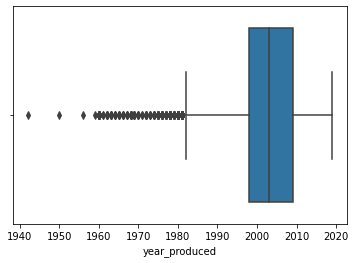

In [266]:
# checking the year using box plot 
sns.boxplot(data=cars_df, x='year_produced');

**Three data points are very far away from the rest data points.**

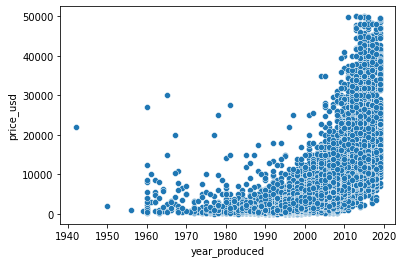

In [267]:
# plotting the scatterplot of the year
sns.scatterplot(data=cars_df, y='price_usd', x='year_produced');

**The year 1942 had a very high value, this will be checked, the point considered as an outlier at year 1950 is not too far from the rest values when plotted on a scatterplot**

In [268]:
cars_df.query('year_produced == 1942')

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,price_group,car_id
23312,ГАЗ,А22,mechanical,green,105000,1942,gasoline,False,gasoline,3.3,pickup,False,owned,rear,22011.76,False,Hrodna Oblast,1,1,True,False,False,False,False,False,False,False,False,False,2,Expensive Cars,23312


In [269]:
# checking all cars by the manufacturer
check = (cars_df.loc[(cars_df['manufacturer_name']== "ГАЗ" )
                            & (cars_df['year_produced'] <= 2000)])

check.sort_values(by=['year_produced'],inplace=True)
check

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,price_group,car_id
23312,ГАЗ,А22,mechanical,green,105000,1942,gasoline,False,gasoline,3.3,pickup,False,owned,rear,22011.76,False,Hrodna Oblast,1,1,True,False,False,False,False,False,False,False,False,False,2,Expensive Cars,23312
23306,ГАЗ,М20,mechanical,blue,100000,1950,gasoline,False,gasoline,2.4,hatchback,False,owned,rear,2000.00,False,Minsk Oblast,5,2,True,False,False,False,False,False,False,False,False,False,3,Low Price,23306
23443,ГАЗ,21,mechanical,black,666,1960,gasoline,False,gasoline,2.4,sedan,False,owned,rear,4000.00,True,Minsk Oblast,3,1,True,False,False,False,False,False,False,False,False,False,64,Low Price,23443
23318,ГАЗ,М20,mechanical,brown,45000,1960,gasoline,False,gasoline,2.1,sedan,False,owned,rear,27000.00,False,Minsk Oblast,22,9,True,False,False,False,False,False,False,False,False,False,178,Expensive Cars,23318
23423,ГАЗ,21,mechanical,white,150000,1960,gasoline,False,gasoline,2.1,sedan,False,owned,front,3000.00,False,Minsk Oblast,13,3,True,False,False,False,False,False,False,False,False,False,55,Low Price,23423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23403,ГАЗ,2705,mechanical,blue,30000,2000,gasoline,False,gasoline,2.5,van,False,owned,rear,1000.00,True,Minsk Oblast,14,5,True,False,False,False,False,False,False,False,False,False,47,Low Price,23403
23385,ГАЗ,3110,mechanical,green,204000,2000,gasoline,False,gasoline,2.3,sedan,False,owned,rear,2100.00,False,Vitebsk Oblast,9,1,True,False,False,False,False,False,False,False,False,False,13,Low Price,23385
23377,ГАЗ,3302,mechanical,other,80000,2000,gas,True,gasoline,2.4,van,False,owned,rear,2150.00,True,Magilev Oblast,4,2,True,False,False,False,False,False,False,False,False,False,15,Low Price,23377
23446,ГАЗ,3110,mechanical,blue,260000,2000,gas,True,gasoline,2.4,sedan,False,owned,rear,650.00,True,Minsk Oblast,6,2,True,False,False,False,False,False,False,False,False,False,78,Low Price,23446


**The outlier observed will be dropped.**

In [270]:
# dropping the outlier
cars_df.drop([23312], axis=0, inplace=True)

In [271]:
cars_df.sample(4)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,price_group,car_id
20337,Audi,80,mechanical,other,310000,1993,gasoline,False,gasoline,2.0,universal,False,owned,front,3000.0,False,Minsk Oblast,4,2,False,True,False,False,False,False,False,False,False,True,5,Low Price,20337
30942,Mazda,6,mechanical,silver,290000,2006,gasoline,False,gasoline,2.0,sedan,False,owned,front,6000.0,True,Gomel Oblast,12,3,False,True,True,False,False,True,False,False,False,True,142,Medium Price,30942
1726,Opel,Vectra,mechanical,violet,280000,2000,gasoline,False,gasoline,1.6,sedan,False,owned,front,3300.0,False,Minsk Oblast,12,13,False,True,False,False,False,False,False,True,False,True,15,Low Price,1726
14500,Renault,Scenic,automatic,silver,300000,2001,gasoline,False,gasoline,1.6,minivan,False,owned,front,3550.0,True,Minsk Oblast,5,30,False,True,False,False,True,True,False,False,True,True,203,Low Price,14500


## Data Visualization

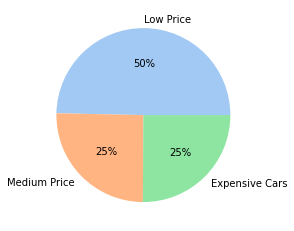

In [272]:
# plot to show distribution of cars
pie_colors = sns.color_palette('pastel')
cars_df['price_group'].value_counts().plot(kind='pie', autopct='%.0f%%', colors=pie_colors);
plt.ylabel('');

**Plot above shows the grouped price detials of all cars**
* 50% of the total number of cars contained in the catalog are of a low price while 25% each of total number of cars belong to the Medium priced and Expensive cars.

### Price of the Car by the Year it was produced and Engine Type

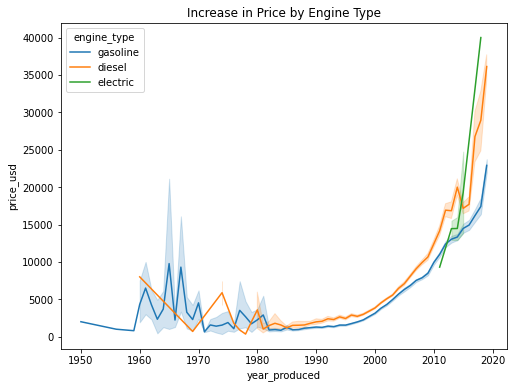

In [273]:
plt.figure(figsize = [8, 6])
sns.lineplot(data=cars_df, x='year_produced', y='price_usd', hue='engine_type');
plt.title('Increase in Price by Engine Type');

**As the year progresses, the price of cars increases. The plot above shows how the price of cars increases as the year increases.**

* Since the start of the production of electric engine cars in 2010, the price increases with each year.
* Prices of cars with diesel and electric engines increased more than cars with gasoline engines.

### Visualizing the effect of engine type and transmission on the price of the car. 

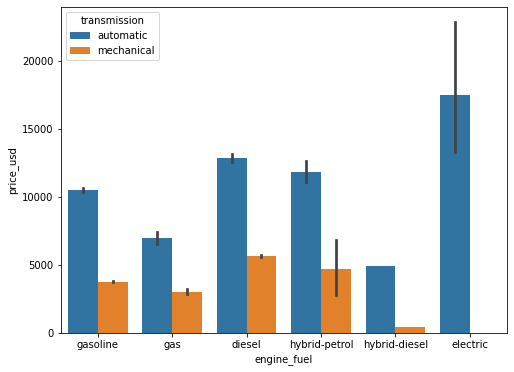

In [274]:
# plot barchart showing the price, engine_type and car tranmission
plt.figure(figsize = [8, 6])
sns.barplot(x='engine_fuel', y='price_usd', hue='transmission', data=cars_df);

**Prices are high for cars using automatic mode of tranmisson than manual. Cars that use electric motors, hybrid-petrol, diesel and run on automatic are more expensive than others.** 

**Gasoline cars follows closely after pure electric, diesel and hybrid cars.**

* Hybrid-petrol cars uses both petrol and electic motors as it's source of power.
* Hybrid-diesel cars uses diesel and electric motors.

### Relationship between the Price of the car and Odometer Value

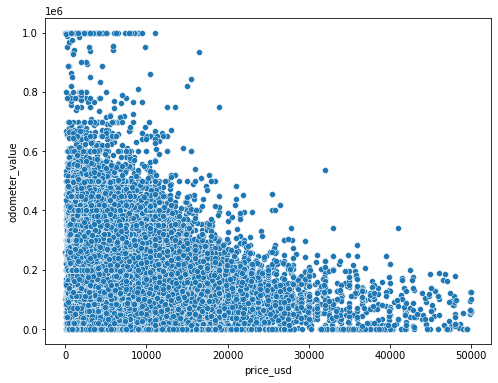

In [275]:
# plot 1: scatterplot to show relationship between price and odometer value
plt.figure(figsize = [8, 6])
sns.scatterplot(y='odometer_value', x='price_usd', data=cars_df);

In [276]:
# group odometer value into low, medium and high
cars_df['odometer_group'] = pd.cut(cars_df['odometer_value'], [-1, 300000, 600000, 1000000], labels=['Low', 'Medium', 'High'])

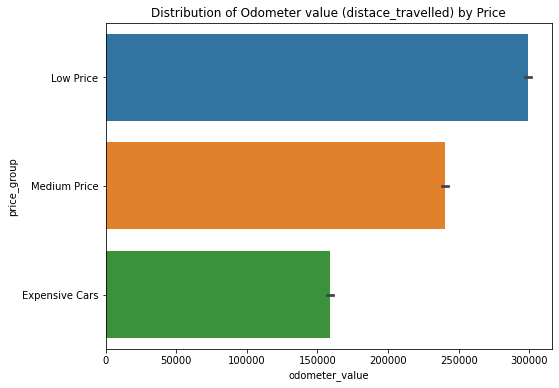

In [277]:
# Plot 3
plt.figure(figsize = [8, 6])
sns.barplot(x='odometer_value', y='price_group', data=cars_df);
plt.title('Distribution of Odometer value (distace_travelled) by Price');

**Conclusion**

* Odomoeter value is the amount of distance a car has travelled for. People tend to go for cars whose odometer value is low as it is believed it hasn't been used for a long time and the cost of maintenance will be low. This value affects the price of a car. The higher the odometer value, the lower the price of the car as depicted in the plots above.

* From the plot (1), a negative correlation is observed, as the price of cars decreases, the odometer value rises. 

In [294]:
# checking cars with odometer value at 0
lowest = cars_df.query('odometer_value == 0')
lowest

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,price_group,car_id,odometer_group
296,LADA,Vesta,mechanical,red,0,2019,gasoline,False,gasoline,1.6,universal,False,new,front,12804.70,False,Minsk Oblast,16,31,False,True,False,True,False,True,False,True,True,True,56,Expensive Cars,296,Low
297,LADA,XRAY,mechanical,orange,0,2019,gasoline,False,gasoline,1.8,suv,False,new,front,12928.00,False,Minsk Oblast,15,32,False,True,False,True,False,True,False,True,True,True,56,Expensive Cars,297,Low
322,LADA,Granta,mechanical,red,0,2019,gasoline,False,gasoline,1.6,liftback,False,new,front,7806.13,False,Minsk Oblast,20,19,True,False,False,False,False,False,False,False,False,False,35,Medium Price,322,Low
354,LADA,Vesta,mechanical,silver,0,2019,gas,True,gasoline,1.6,sedan,False,new,front,13800.00,False,Minsk Oblast,24,27,False,True,False,True,False,True,True,True,True,True,140,Expensive Cars,354,Low
364,LADA,Vesta,mechanical,white,0,2019,gas,True,gasoline,1.6,sedan,False,new,front,12500.00,False,Minsk Oblast,6,2,False,True,False,True,False,True,False,True,True,False,27,Expensive Cars,364,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34162,Mercedes-Benz,A200,automatic,silver,0,2019,gasoline,False,gasoline,1.3,sedan,False,new,front,34228.29,False,Minsk Oblast,13,2,True,False,False,False,False,False,False,False,False,False,3,Expensive Cars,34162,Low
34427,Mercedes-Benz,A200,automatic,white,0,2019,gasoline,False,gasoline,1.3,hatchback,False,new,front,25500.00,False,Minsk Oblast,5,28,False,False,False,False,True,True,False,False,True,True,33,Expensive Cars,34427,Low
34434,Mercedes-Benz,GLA200,automatic,black,0,2019,gasoline,False,gasoline,1.6,suv,False,new,front,31500.00,False,Minsk Oblast,8,3,False,False,False,False,False,True,False,False,False,False,4,Expensive Cars,34434,Low
34435,Mercedes-Benz,A200,automatic,red,0,2019,gasoline,False,gasoline,1.3,hatchback,False,new,front,32900.00,False,Minsk Oblast,8,3,False,False,False,False,False,True,False,False,False,False,4,Expensive Cars,34435,Low


In [285]:
# checking the state of the cars
lowest['state'].value_counts()

new    406
Name: state, dtype: int64

In [286]:
# checking the price group of the cars
lowest['price_group'].value_counts()

Expensive Cars    405
Medium Price        1
Low Price           0
Name: price_group, dtype: int64

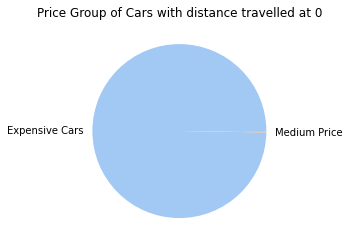

In [297]:
lowest['price_group'].value_counts().plot(kind='pie', colors=pie_colors);
plt.ylabel("");
plt.title('Price Group of Cars with distance travelled at 0');

**Cars with zero distance travelled are all new cars and expensive. Only one car is at a medium price.**

### Plot showing the count of Expensive cars and Manufacturers

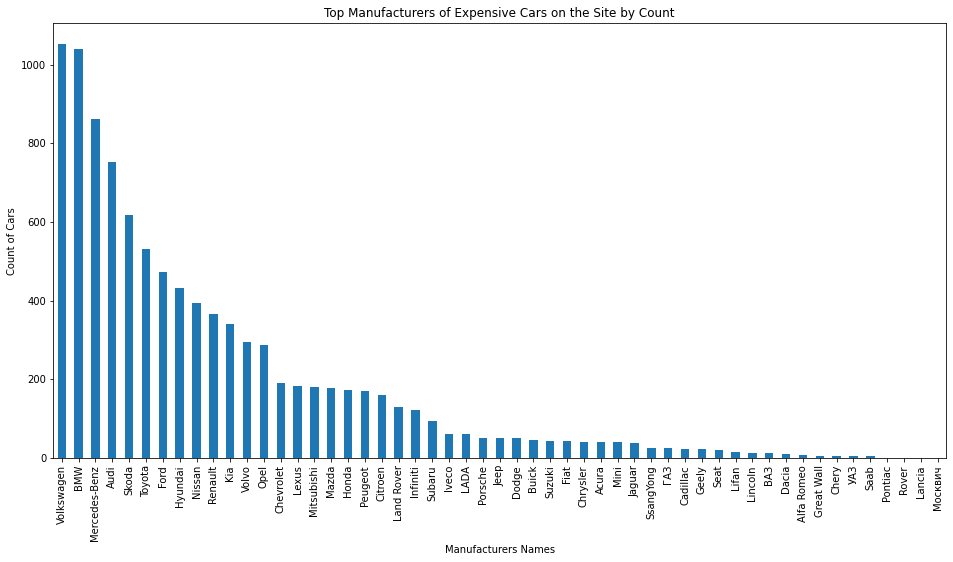

In [136]:
# Manufacturers of expensive cars
high_price = cars_df.query('price_usd >= 8900')
high_price['manufacturer_name'].value_counts().plot(kind='bar', figsize=(16,8));
plt.ylabel('Count of Cars')
plt.xlabel('Manufacturers Names')
plt.title('Top Manufacturers of Expensive Cars on the Site by Count')
plt.show();

**Conclusion from plot above:**
* In the used_car catalog website, Volkswagen, BMW, Mercedes-Benz and Audi tops the list of manufacturers that has the most expensive cars for sale.

### Investigating the Price of a Car in relation to its body type

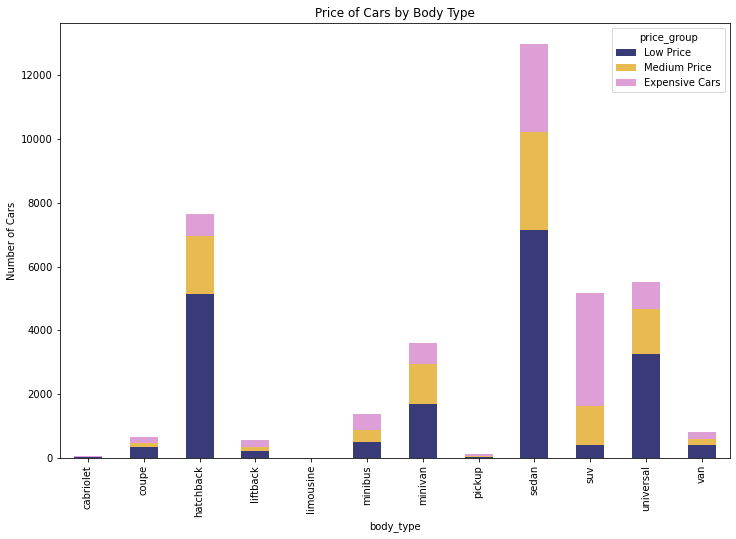

In [133]:
# plot to show the category of price with body type
pd.crosstab(cars_df['body_type'], cars_df['price_group']).plot(kind='bar', stacked=True, figsize=(12,8), colormap='tab20b');
plt.title("Price of Cars by Body Type")
plt.ylabel("Number of Cars");

**Conclusion from plot above:**
* Sedan and Hatchback are the 2 most popular class of cars put up for sale on the catalog. SUV and Sedan cars have a larger percentage of expensive cars than the rest.

### Checking if having a warranty influences the price of the car

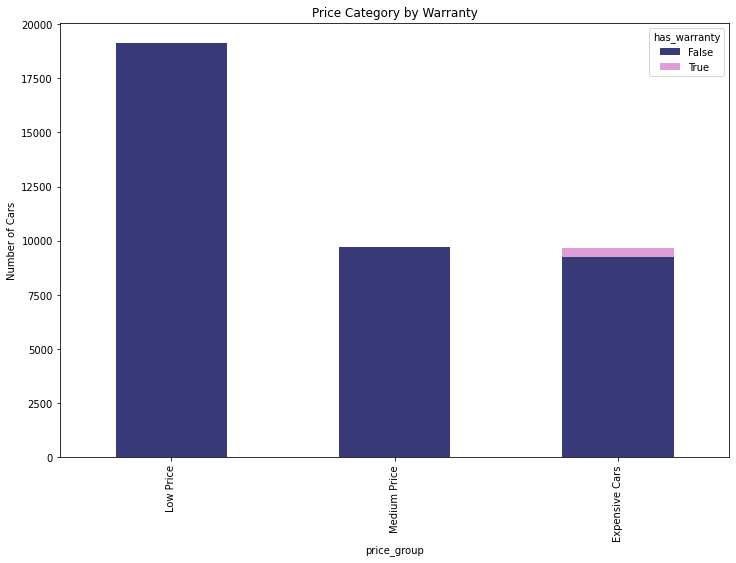

In [233]:
# distribution of warranted cars
pd.crosstab(cars_df['price_group'], cars_df['has_warranty']).plot(kind='bar', stacked=True, figsize=(12,8), colormap='tab20b');
plt.title("Price Category by Warranty")
plt.ylabel("Number of Cars");

**From the plot above, it shows that majority of cars with warranty are expensive.**

### Count of Cars by Region

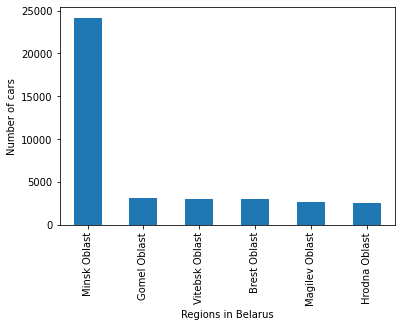

In [232]:
# count of cars by the location region
cars_df['location_region'].value_counts().plot(kind='bar');
plt.xlabel('Regions in Belarus');
plt.ylabel('Number of cars');

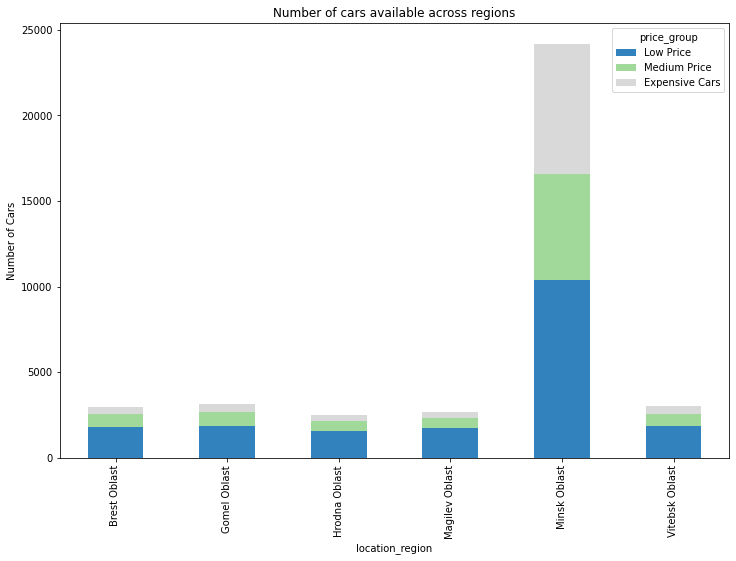

In [235]:
pd.crosstab(cars_df['location_region'], cars_df['price_group']).plot(kind='bar', stacked=True, figsize=(12,8), colormap='tab20c');
plt.title("Number of cars available across regions")
plt.ylabel("Number of Cars");

**From the plots above, Minsk Oblast has the highest amount of cars put up for sale. The proportion of low price, medium price and expensive cars seems to be same across the other 5 regions in Belarus.**

## Report Summary (Insights)

**After cleaning and visualizing the dataset the following insights were drawn:**

* The price of cars tend to increase as the years advances.
* Electric cars experienced an increase in price from 2010 to 2020.
* Cars that have travelled a long distance before being put up for sale have a lower price compared to those with lower amount of distance travelled.
* Cars with warranty are of a higher price.
* 99% of cars with zero amount of distance travelled are all new cars and expensive.

#### Save the dataset

In [298]:
#Save the dataset
cars_df.to_csv('clean_data.csv', index=False)